# Tutorial 10: Vibrating Strings 

In this tutorial you will find the solution of one-dimensional wave equation using finite difference method. 

### Preliminary assignments:
1- Read sections 21.1 and 21.2 of the book. 

2- Read the theory of Hyperbolic wave equation and explain all the assumptions behind the wave equation (equation 21.4 of the book)

3- Read and understand how to obtain the final numerical formulation for solving 1D wave equation. 

4- Write a pseudocode for solving 1D wave equation.



# Exercise 1: Vibration of strings

-  Consider a string of length $L$ tied down at both ends (see figure). The string has a constant density $\rho$ per unit length, a constant tension $T$, no frictional forces acting on it, and a tension that is so high that we may ignore sagging as a result of gravity. We assume that the displacement of the string from its rest position $y(x, t)$ is in the vertical direction only and that it is a function of the horizontal location along the string $x$ and the time $t$.

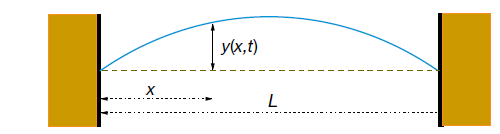


-  The 1D wave equation can be written as: $$\frac{\partial^2 y(x,t)}{\partial x^2}=\frac{1}{c^2}\frac{\partial^2 y(x,t)}{\partial t^2},$$ 


$$c=\sqrt{\frac{T}{\rho}}$$ 

-  To find the solution to the wave equation you need two boundary conditions and two initial conditions. In this tutorial we will use the following boundary conditions (fixed boundary conditions at $x=0,L$).  $$y(0,t)=0$$ $$y(L,t)=0$$ For the initial conditions first we choose an arbitrary shape for the initial configuration ($t=0$) of the string which satisfies the boundary conditions (you will use different functions for $f(x)$, see equation below). The second initial condition is that the string is released from rest. 


$$y(x,0)= f(x)$$ 

$$\frac{\partial y(x,t=0)}{\partial t}=0$$


-  The length of the string is $L = 1m$ with the space grid set at 101 points, corresponding to $\Delta = 0.01 m$. The values of density and tension are entered as constants, $\rho = 0.01 kg∕m$ and $T =40 N$.


#### Programming steps and Questions

Note 1: Please see #Q* inside the code cell below for where to insert the code.

1. We use the central-difference approximation to discretize the wave equation into a difference equation (see below). This form permits us to predict the future solution from the present and past solutions. Complete the code and add the following expression. Explain why you cannot use this expression for the first time step. 
$$y_{i,j+1}=2y_{i,j}-y_{i,j-1}+\frac{c^2}{c'^2}[y_{i+1,j}+y_{i-1,j}-2y_{i,j}],$$


$$c'=\frac{\Delta(x)}{\Delta(t)}$$

2. As you can see initializing the recurrence relation is a bit tricky because it requires displacements from two earlier times, whereas the initial conditions are for only one time. Nonetheless, the rest condition ( $\frac{\partial y(x,0)}{\partial t}=0$) when combined with the central-difference approximation lets us extrapolate to negative time to obtain the following expression for the $\textbf{first step}$ (equation 21.23 of the book). Add this expression to your code.
$$y_{i,2}=y_{i,1}+\frac{c^2}{2c'^2}[y_{i+1,1}+y_{i-1,1}-2y_{i,1}],$$ 

3. Append the solutions for the next step to curve object ""vibst"", and update the present and past time solutions. In this way, we only need to store the solutions for three time steps which saves memory.
 

4. Use $f(x)=0.1sin(i\frac{\pi}{100})$ and run your code. Which normal mode is excited? Is it a traveling or standing wave? Change the initial condition to excite higher normal modes. Hint: change the period of the initial sine wave.


5. Explore a number of space and time step combinations. In particular, try steps that satisfy and that do not satisfy the Courant condition. Does your exploration confirm the stability condition? (According to Courant stability condition solution will be stable for the general class of transport equations if $c\leq c'=\frac{\Delta x}{\Delta t}$)


6. Use the following functions as the initial configuaration of string $y(x,t=0)$. For each case examine the vibration mode and decide whether you have a standing wave or a travelling wave (observe whether the pulses move or just oscillate up and down). 

$$f(x)=0.1sin(4i\frac{\pi}{100})$$

$$f(x)=0.1sin(i\frac{\pi}{100})+0.1sin(2i\frac{\pi}{100})$$

$$ f(x)=\begin{cases} 
      0 & x\leq 40 \\
      0.1\exp(\frac{-(0.01i-0.5)^{2}}{0.0008}) & 40\leq x\leq 60 \\
      0 & x>60 
   \end{cases}
$$


$$ f(x)=\begin{cases} 
      0 & x\leq 10 \\
      0.1\exp(\frac{-(0.01i-0.2)^{2}}{0.0008}) & 10\leq x\leq 30 \\
      0 & x>30 
   \end{cases}
$$


$$ f(x)=\begin{cases} 
      0 & x\leq 10 \\
      0.1\exp(\frac{-(0.01i-0.2)^{2}}{0.0008}) & 10\leq x\leq 30 \\
      0 & 30<x<70 \\
      0.1\exp(\frac{-(0.01i-0.8)^{2}}{0.0008}) & 70\leq x\leq 90 \\
      0 & x> 90 \\
   \end{cases}
$$

$$ f(x)=\begin{cases} 
      0 & x\leq 10 \\
      0.1\exp(\frac{-(0.01i-0.2)^{2}}{0.0008}) & 10\leq x\leq 30 \\
      0 & 30<x<70 \\
      -0.1\exp(\frac{-(0.01i-0.8)^{2}}{0.0008}) & 70\leq x\leq 90 \\
      0 & x> 90 \\
   \end{cases}
$$


7. Explain what happens when traveling waves collide or reach the boundaries.  




In [ ]:
from vpython import *
import numpy as np
scene1=canvas()
x = np.zeros((100), float)
y = np.zeros((100), float)

# Set up curve
g = canvas(canvas=scene1, width = 600, height = 300, title = 'Vibrating string')
vibst = curve(vector(x[0],y[0],0), color = color.yellow)
ball1 = sphere(pos = vector(100, 0,0), color = color.red, radius = 2)
ball2 = sphere(pos = vector( - 100, 0,0), color = color.red, radius = 2)
ball1.pos
ball2.pos
vibst.radius = 1.0

# Parameters
rho   = 0.01  
ten   = 40                                               
c     = sqrt(ten/rho)                                  
c1    = c                                                # CFL criterium
ratio =  c*c/(c1*c1)

# Initialization
xi = np.zeros((101,3), float)      

for i in range(0, 101):     xi[i, 0] = 0.1*sin(4*i*pi/100);                                            #### Here you can edit the initial configuration of the string####
                                                      #Q4. Edit xi array to define the initial configuration of your string#
for i in range(0, 100):                                      # we use this mapping for better visualization
    x[i] = 2.0*i - 100.0                            
    y[i] = 300.*xi[i, 0]
    vibst.append(vector(x[i],y[i],0))

                 
xi[i,1]=xi[i,0]+0.5*ratio*(xi[i+1,0]+xi[i-1,0]-2*xi[i,0]) 
        
while 1:                               
    rate(10)                                            
    for i in range(1, 100):     
        xi[i,2]=2*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+ xi[i-1,1]-2*xi[i,1])
    
        vibst.clear()
    for i in range(1, 100):      
        x[i] = 2.0*i - 100.0                            
        y[i] = 300.*xi[i, 0]
        vibst.append(vector(x[i],y[i],0))                                                                               
    for i in range(0, 101):
        xi[i,0]=xi[i,1] 
        xi[i,1]=xi[i,2]                                                               
                              



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>